In [1]:
import os
import sys
sys.path.append((os.path.relpath('C:/Users/Hang/resipy/src'))) # add here the relative path of the API folder
from ERT_preproc import *
from pygimli.physics import ert
import numpy as np
# from resipy import R2
import matplotlib.pyplot as plt
import math
import progressbar
import datetime as dt
import seaborn as sns
import pandas as pd
import pygimli.meshtools as mt
from ERTpm.process import process
from ERTpm.process import ERTdataset, read_labrecque,read_bert,output_file        

import pygimli as pg

In [2]:
filename = './Processed Data/Heated Plot/20191219_0146_P1.ohm'
data = ert.load(filename[:-3]+'dat')

In [3]:
np.array(data.sensors()[0])

array([ 0.021,  0.343, -5.486])

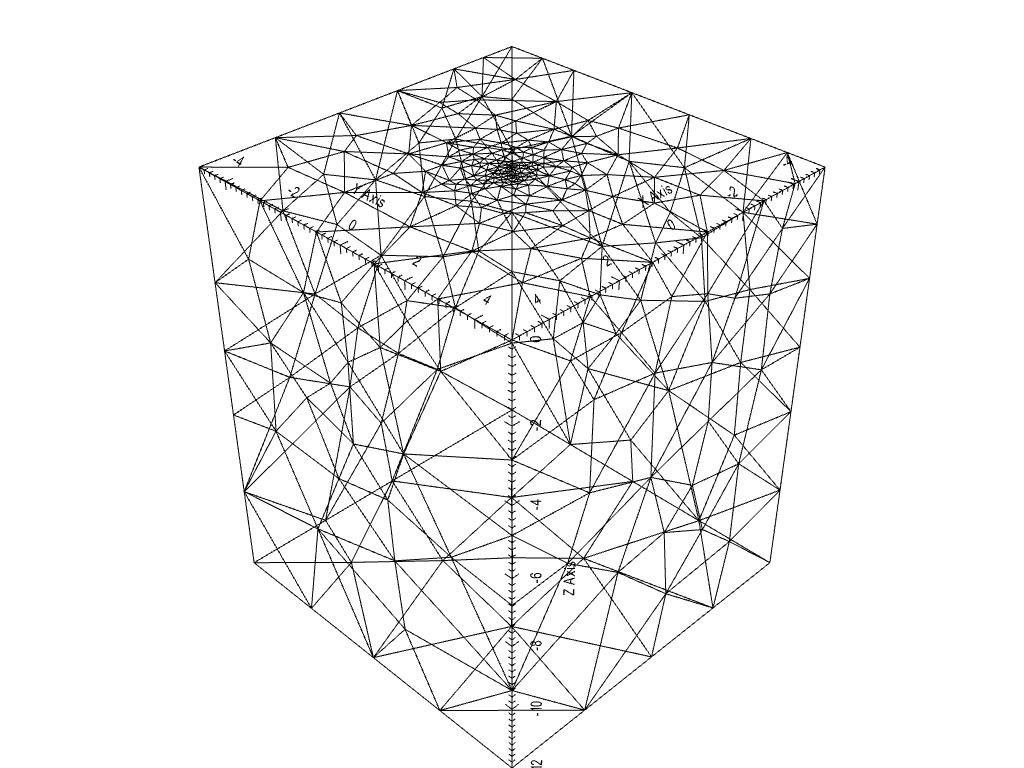

(<pyvista.plotting.plotting.Plotter at 0x16f2a0d4100>, None)

In [4]:
plc3 = mt.readSTL('invwithconstraint.stl', binary=False)

for s in data.sensors():
    plc3.createNode(s)
    #plc3.createNode(s,marker=-99)
    #plc3.createNode(s+[0,0,0.01])
    
    
mesh1 = mt.createMesh(plc3,area= 100)
pg.show(mesh1)

In [5]:
for c in mesh1.cells():
    if c.marker()==3:
        c.setMarker(1)
    elif c.marker()==1:
        c.setMarker(3)

In [6]:
mesh1

Mesh: Nodes: 2435 Cells: 13756 Boundaries: 27832

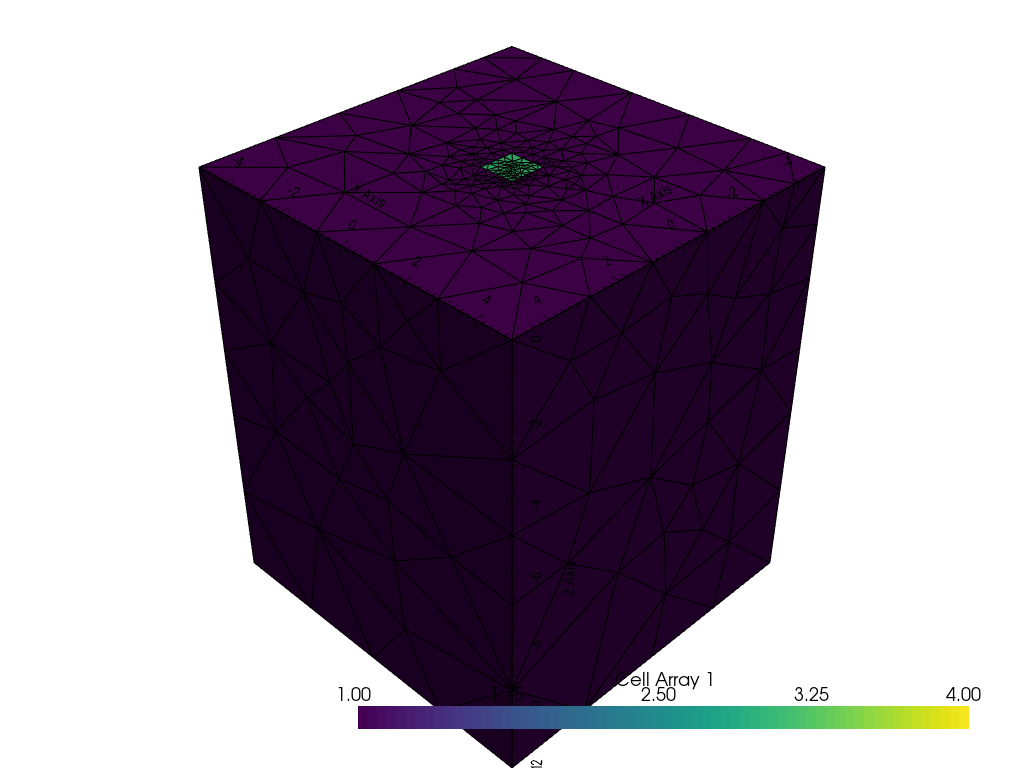

In [7]:
pg.show(mesh1, mesh1.cellMarkers())
mesh1.exportVTK('test3.vtk')

In [8]:
for b in mesh1.boundaries():
    if b.outside():
        if abs(b.center()[2]-0) <1e-1:
            b.setMarker(pg.core.MARKER_BOUND_HOMOGEN_NEUMANN)
            #print(b.center(),b.marker())
        elif abs(b.center()[0]+5) <1e-3 or abs(b.center()[0]-5) <1e-3 or abs(b.center()[1]+5) <1e-3 or abs(b.center()[1] - 5) <1e-3 or abs(b.center()[2] + 12) <1e-3:            
            b.setMarker(pg.core.MARKER_BOUND_MIXED)
            #print(b.center(),b.marker())

In [9]:
mesh1.save('inv1.bms')

1

In [10]:
mgr = ert.ERTManager(data, verbose=True)
mgr.setMesh(mesh1)
mgr.paraDomain.exportVTK('test4.vtk')

12/07/22 - 12:16:41 - pyGIMLi - INFO - Found 4 regions.
12/07/22 - 12:16:41 - pyGIMLi - INFO - Region with smallest marker (1) set to background
12/07/22 - 12:16:41 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/07/22 - 12:16:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


In [11]:
data['err'] = mgr.estimateError(data)
mgr.invert(data,lam=20)

12/07/22 - 12:16:45 - pyGIMLi - INFO - Use median(data values)=204.8168409478215
12/07/22 - 12:16:45 - pyGIMLi - INFO - Created startmodel from forward operator: 6338 [204.8168409478215,...,204.8168409478215]
12/07/22 - 12:16:45 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000016F54B5DB80>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000016F57160900>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000016F57160950>
min/max (data): 0.13/9959
min/max (error): 3%/3.79%
min/max (start model): 205/205
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 3105.36 (dPhi = 41.2%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 2783.86 (dPhi = 9.94%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2466.48 (dPhi = 10.71%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 2434.04 (dPhi = 1.21%) lam: 20.0
################################################

6338 [295.67273324291983,...,4435.725446489833]

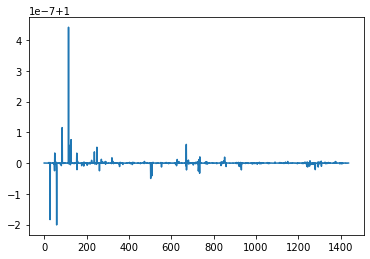

In [12]:
mr = pg.matrix.RVector(np.ones(mgr.paraDomain.cellCount())*1)
d = mgr.fop.response(mr)
plt.plot(np.array(d))

In [13]:
mgr.paraDomain

Mesh: Nodes: 1356 Cells: 6338 Boundaries: 13247